
# Project: Diving Deep into the World of Hollywood

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Welcome to my project. We will be looking at the TMDB - movies dataset which contains extensive detail on around 10000 movies. We will be exploring the dataset and figure out which questions can pe posed as well as answered on the basis of the dataset. After forming the questions, we will move forward with cleaning and manipulating our data to optimise our dataset which we will be using to create visuals and make our final conclusions.
>
> Let's begin by importing all the required packages, modules and our dataset into our workspace for investigation.

In [286]:
# Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Loading in our data
df=pd.read_csv('tmdb-movies.csv')


In [287]:
#Getting list of all the column labels present in the dataset
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

## Brief Description of Column Labels
**id**                      - Unique Identifier with respect to the database <br>
**imdb_id**                 - Unique Identifier with respect to IMDB API <br>
**popularity**              - Measurement of poularity of a movie <br>
**budget**                  - Budget/Cost of making the movie <br>
**revenue**                 - Revenue generated from the movie <br>
**original_title**          - Title of movie<br>
**cast**                    - Main Actors/Actresses present in movie seperated by '|'<br>
**homepage**                - Website URL put up for movie (if any)<br>
**director**                - Director of movie<br>
**tagline**                 - Tagline used in the movie<br> 
**keywords**                - Keywords which describe main elements of the movie<br>
**overview**                - Bried Summary of the plot<br>
**runtime**                 - Length of the movie (in minutes)<br>
**genres**                  - Genre of movie (>=1 Genre)<br>
**production_companies**    - Companies who contributed to the production of the film majorly<br>
**release_date**            - Exact release date of a film<br>
**vote_count**              - Number of people who took part in rating the film<br>
**vote_average**            - Average of all the ratings given<br>
**release_year**            - year of release<br>
**budget_adj**              - budget adjusted in terms of 2010 accounting for inflation over time<br>
**revenue_adj**             - revenue adjusted in terms of 2010 accounting for inflation over time

In [288]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


## Questions 
>Upon looking at the dataset, there are a few interesting questions that can be asked pertaining to the data. Few of those questions which we will be looking into are :
>
>**1)** What features/properties majorly influence the success of a film (revenue) ? 
>
>**2)** Which genres are most popular from year to year?
>

<a id='wrangling'></a>
## Data Wrangling

> In this section of our data, we will be cleaning, trimming and manipulating our data in order to get the best result possible for the questions we posed

### General Properties
>Let's start by getting to know more about our data

In [289]:
#Finding about number of missing values present in each column along with their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

According to the information we just pulled out, data regarding homepage of movies is missing in most of the columns and hence, should be dropped (It also holds no importance to our analysis). A few other columns such as 'keywords','production_companies' also have missing values which also have to be dealt with. But besides that, it seems like we have rest of the crucial data such as revenue and budget for every record.

In [290]:
# Fetching Basic statistical estimates of the numerical columns present in our dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Roadblock Ahead
>When we checked the .info() method, it seemed like we had the budget and revenue of every movie but when we checked our basic statiscal estimates, it is found that around 50% of the budget as well as revenue is reported as 0, which is simply impossible. Thus, it is safe to assume that all the instances reported as 0 are simply missing values being represented by zero
>
>And without knowing our budget as well as revenue, we won't be able to figure out whether a movie was successful or not

### Data Cleaning 
>We Will be getting rid off duplicates
>
>We will be dropping redundant columns which do not help us to minimise the size of our dataset and make operations faster
>
>We will also be figuring out what to do with our budget/revenue problem. Also, we can drop budget and revnue columns and keep adjusted budget and columns only instead since they give a good comparison with all movies since they account inflation as well.

In [291]:
#checking number of duplicates
print(sum(df.duplicated()))

#dropping duplicates
df.drop_duplicates(inplace=True)

1


In [292]:
df.drop(['imdb_id','tagline','homepage','overview','budget','revenue','keywords'],axis=1, inplace=True)

>We removed one of the unique identifiers since we do not need to uniquely identify the movies in this case
>
>We might need one unique identfier later on when we are manipulating data to avoid data loss

In [293]:
# We will first be replacing the 0s with Nan to get a better view of the depth of the problem
df['budget_adj']=df['budget_adj'].replace({0: None})
df['revenue_adj']=df['revenue_adj'].replace({0: None})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              5169 non-null object
revenue_adj             4849 non-null object
dtypes: float64(2), int64(4), object(8)
memory usage: 1.2+ MB


>We need to fix the data types of adjusted revenue and budget
>
>Also need to change release_date into date-time data-type 

In [332]:
df['budget_adj']=df['budget_adj'].astype(float)
df['revenue_adj']=df['revenue_adj'].astype(float)
df['release_date']=pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 16 columns):
id                      10842 non-null int64
popularity              10842 non-null float64
original_title          10842 non-null object
cast                    10767 non-null object
director                10800 non-null object
runtime                 10842 non-null int64
genres                  10842 non-null object
production_companies    9826 non-null object
release_date            10842 non-null datetime64[ns]
vote_count              10842 non-null int64
vote_average            10842 non-null float64
release_year            10842 non-null int64
budget_adj              5168 non-null float64
revenue_adj             4849 non-null float64
profit                  3854 non-null float64
roi                     3854 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(4), object(5)
memory usage: 1.7+ MB


>We have to get rid of instances where no genre has been given

In [295]:
#Filtering the dataset to find all the instances where genre is missing
genre_nan=df[df['genres'].isnull()]
#confirming that we have filtered correctly
genre_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 424 to 10659
Data columns (total 14 columns):
id                      23 non-null int64
popularity              23 non-null float64
original_title          23 non-null object
cast                    22 non-null object
director                21 non-null object
runtime                 23 non-null int64
genres                  0 non-null object
production_companies    9 non-null object
release_date            23 non-null object
vote_count              23 non-null int64
vote_average            23 non-null float64
release_year            23 non-null int64
budget_adj              1 non-null float64
revenue_adj             0 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 2.7+ KB


In [296]:
#Dropping the Filtered Instances from the original dataset
df.drop(genre_nan.index,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 14 columns):
id                      10842 non-null int64
popularity              10842 non-null float64
original_title          10842 non-null object
cast                    10767 non-null object
director                10800 non-null object
runtime                 10842 non-null int64
genres                  10842 non-null object
production_companies    9826 non-null object
release_date            10842 non-null object
vote_count              10842 non-null int64
vote_average            10842 non-null float64
release_year            10842 non-null int64
budget_adj              5168 non-null float64
revenue_adj             4849 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


>I believe we have cleaned our dataset in the general form. More cleaning can be done clearly, but that is specific to each question and will be done so when we will be getting to each question one by one. No further cleaning can be done without damaging the result of one question or another.

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we have trimmed and cleaned our data, it's time for us to make use of data manipulations and visualisations to address each question that we have posed

### 1) The Most Popular Genres on a Year to Year Basis
> To know which genres were popular on a year to year basis, we have to group the data according to their release year. Luckily, we already have a column present which holds the release year itself, so we wouldn't need to extract that information
>But first, we have to create an individual record for each genre present in a movie. Hence we have to split the genres which are combined usin '|'

In [297]:
#Splitting the genres by '|' and converting them into lists
df['genres']=df['genres'].apply(lambda x:list(x.split('|')))
df.head()


,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>We will now create a copy of this dataset but will only keep the columns we need to find the answer to the given question <br>
**id** - we will be using this to split the genres into individual records and avoid data loss <br>
**release_year** - since we need to find the most popular genre on year to year basis <br>
**genres**  - to know the genre of the film <br>
**popularity** - metric used to measure the popularity of a film <br>

In [298]:
#Using the columns we require for this question
genre=df[['id','release_year','genres','popularity']]
genre.head()

,id,release_year,genres,popularity
0,135397,2015,"[Action, Adventure, Science Fiction, Thriller]",32.985763
1,76341,2015,"[Action, Adventure, Science Fiction, Thriller]",28.419936
2,262500,2015,"[Adventure, Science Fiction, Thriller]",13.112507
3,140607,2015,"[Action, Adventure, Science Fiction, Fantasy]",11.173104
4,168259,2015,"[Action, Crime, Thriller]",9.335014


In [299]:
#Creating a new record for each genre present in a list
genre=genre.genres.apply(pd.Series).merge(genre, right_index = True, left_index = True).drop(["genres"], axis = 1).melt(id_vars = ['id','release_year','popularity'], value_name = "genres").drop("variable", axis = 1).dropna()


In [300]:
#Checking result
genre.head()

,id,release_year,popularity,genres
0,135397,2015,32.985763,Action
1,76341,2015,28.419936,Action
2,262500,2015,13.112507,Adventure
3,140607,2015,11.173104,Action
4,168259,2015,9.335014,Action


In [301]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26955 entries, 0 to 54195
Data columns (total 4 columns):
id              26955 non-null int64
release_year    26955 non-null int64
popularity      26955 non-null float64
genres          26955 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 1.0+ MB


>We have successfully seperated the genres into different rows. Now all we have to do is group the data into year and count the occurence of each genre

In [302]:
#Grouping the data according to release_year and calculating the total popularity each genre has gathered each year
x=genre.groupby(['release_year','genres'])['popularity'].sum()
#Selecting the Genre which has garnered the most popularity in totality each year
x=x.groupby(['release_year']).nlargest(1)
x.index = x.index.droplevel()
#Viewing Our Final Results
x

release_year  genres   
1960          Drama          7.361967
1961          Drama          6.915731
1962          Drama          8.232008
1963          Thriller       7.199292
1964          Comedy         7.859657
1965          Drama          6.105756
1966          Drama          5.436264
1967          Drama          8.183477
1968          Drama          7.546450
1969          Drama          6.368528
1970          Drama          6.015169
1971          Drama         12.093149
1972          Drama         11.127861
1973          Drama         14.752277
1974          Drama         11.044738
1975          Drama          9.498630
1976          Drama         12.950282
1977          Adventure     21.107186
1978          Drama         10.224622
1979          Drama         14.241453
1980          Action        16.057688
1981          Adventure     12.261412
1982          Drama         17.947000
1983          Action        17.877840
1984          Action        25.232337
1985          Comedy      

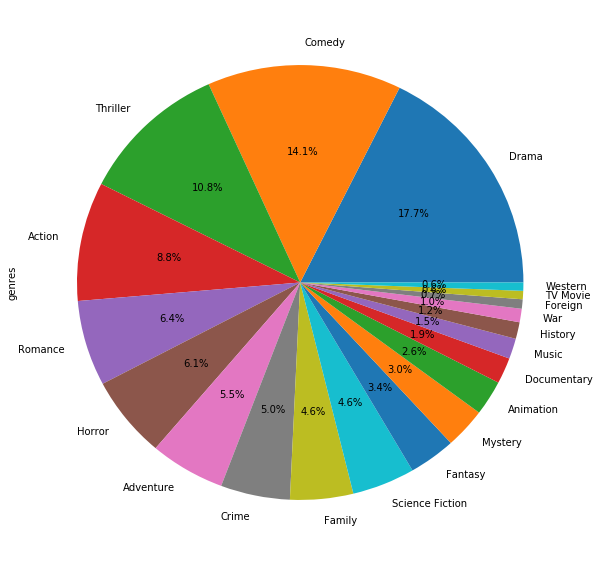

In [303]:
#Visualising to see in which genres have film-makers worked on since the 1960s to upto 2015
plt.figure(figsize=(10,10))
genre['genres'].value_counts().plot(kind='pie',autopct='%1.1f%%');


### 2) Which features contribute to the success of a movie

>For this we will only be able to use part of the dataset whose data on budget and revenue is available 

In [304]:
#We will have to filter out values where either budget or revenue details are missing
movies=df[(df['budget_adj'].isnull()==False)&(df['revenue_adj'].isnull()==False)]
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 14 columns):
id                      3854 non-null int64
popularity              3854 non-null float64
original_title          3854 non-null object
cast                    3850 non-null object
director                3853 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null object
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
budget_adj              3854 non-null float64
revenue_adj             3854 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 451.6+ KB


>We could not fill up the missing values since we'd be filling up more than 20% of our data purely on assumption which will damage the suitability of our answers in accordance with real life. Hence, dropping them is the only way, it limits our dataset considerably when compared to the original size of our dataset, but there is less risk of getting a wrong answer.
>
>After taking care of the missing values, we need to measure the profits made by each movie, that is the difference between the budget and revenue made by film

In [305]:
#Calculating the profit made by each film in absolute terms
df['profit']=df['revenue_adj']-df['budget_adj']
#Checking the results obtained
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


>Now that we've calculated the profit, let's try to get more meaning out of it, by finding out the (ROI)ratio between money invested (budget) and money earned (profit), to see find out which movies were more worth investing in, in other words more of a success
>
>And for further simplification, since all movie budgets are above million, we will divide the budget and revenue by million to be easier to read and understand

In [306]:
#Simplifying budget,revenue and profit in terms of millions
df['budget_adj']=df['budget_adj']/1000000
df['revenue_adj']=df['revenue_adj']/1000000
df['profit']=df['profit']/1000000
df.head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137.999939,1392.445893,1254.445953


In [309]:
#Calculating the Return on Investment for each movie
df['roi']=((df['profit']/df['budget_adj'])*100)
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,roi
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137.999939,1392.445893,1254.445953,909.019207
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137.999939,348.161292,210.161353,152.290903
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101.199955,271.619025,170.419070,168.398365
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183.999919,1902.723130,1718.723211,934.089113
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174.799923,1385.748801,1210.948878,692.762821


In [310]:
#Getting Some basic understanding about the new column
df.roi.describe()

count    3.854000e+03
mean     2.970412e+04
std      1.644256e+06
min     -9.999998e+01
25%     -1.234118e+01
50%      1.119690e+02
75%      3.210444e+02
max      1.018618e+08
Name: roi, dtype: float64

>Now that we have information on the profit generated as well as the return on investment for all films in the remaining dataset, we should filter out to see the properties of successful films
>
>But before we filter out successful films, we need to define what a successful film is.
>
>According to film-makers and experts, as a rule of thumb, the revenue of a film should be 3 times that of the budget atleast. 

In [335]:
#Filtering out to get the successful films
success=df[df['roi']>300]
#Checking Results
success.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026 entries, 0 to 10828
Data columns (total 16 columns):
id                      1026 non-null int64
popularity              1026 non-null float64
original_title          1026 non-null object
cast                    1025 non-null object
director                1026 non-null object
runtime                 1026 non-null int64
genres                  1026 non-null object
production_companies    1019 non-null object
release_date            1026 non-null datetime64[ns]
vote_count              1026 non-null int64
vote_average            1026 non-null float64
release_year            1026 non-null int64
budget_adj              1026 non-null float64
revenue_adj             1026 non-null float64
profit                  1026 non-null float64
roi                     1026 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(4), object(5)
memory usage: 136.3+ KB


>Now, we can start comparing the profit, roi with other factors to find if there is any sort of influence

count    1026.000000
mean        6.540058
std         0.738584
min         3.400000
25%         6.100000
50%         6.600000
75%         7.100000
max         8.400000
Name: vote_average, dtype: float64

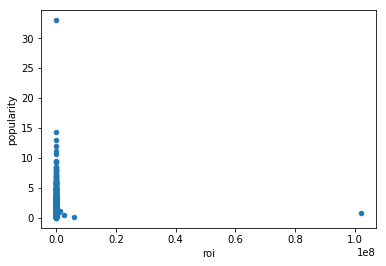

In [336]:
#Checking if popularity has any effect on profit
success.plot(kind='scatter',x='roi',y='popularity');
success['vote_average'].describe()

>There seems to be an outlier on the bottome right of the chart,which seems to have an ROI way greater than the rest

In [337]:
#Checking the outlier
success[success['roi']==success['roi'].max()]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,roi
10495,8856,0.772494,"The Karate Kid, Part II",Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,John G. Avildsen,113,"[Adventure, Drama, Action, Romance, Family]",Columbia Pictures Corporation|Delphi V Product...,1986-06-18,211,5.8,1986,0.000225,228.988594,228.988369,1.018618e+08


>After cross-checking using the internet, it seems that there isn't such a drastic difference between budget and revenue at all, and the data has been falsely reported.
>
>We also found the the highest grossing films of all time, and the difference between budget and revenue at best seems to be around 100:1

In [338]:
#Keeping our data safe and avoiding risks by removing outliers
success=success[success['roi']<10000]
success.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 10828
Data columns (total 16 columns):
id                      1000 non-null int64
popularity              1000 non-null float64
original_title          1000 non-null object
cast                    999 non-null object
director                1000 non-null object
runtime                 1000 non-null int64
genres                  1000 non-null object
production_companies    993 non-null object
release_date            1000 non-null datetime64[ns]
vote_count              1000 non-null int64
vote_average            1000 non-null float64
release_year            1000 non-null int64
budget_adj              1000 non-null float64
revenue_adj             1000 non-null float64
profit                  1000 non-null float64
roi                     1000 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(4), object(5)
memory usage: 132.8+ KB


### Do Movie Scores Affect the Success of a Movie
>Now that we've built our dataset of successful films, we should have a data set of flop films to compare it with and check whether voting scores have anything to with the success of a film

Text(0.5,1,'Flop Films')

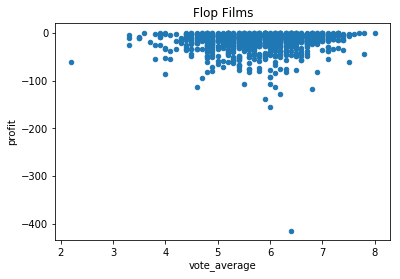

In [339]:
#Filtering from original dataset to retrieve flop films
fail=df[df['roi']<0]
#checking the relation between profit and voting average
fail.plot(kind='scatter',y='profit',x='vote_average');
fail['vote_average'].describe()
plt.title('Flop Films')

Text(0.5,1,'Successful Films')

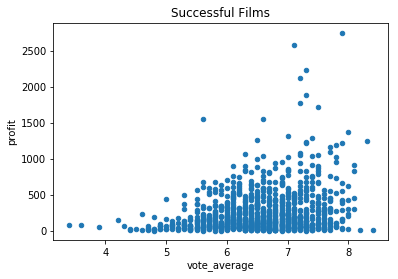

In [340]:
success.plot(kind='scatter',y='profit',x='vote_average');
success['vote_average'].describe()
plt.title('Successful Films')

>After observing both the graphs, it seem like voting averages are not a definitive contributor towards the outcome of a film. Movie with ratings ranging for 5 to 7 having completely uncertain outcomes, but it seems to slightly favour success if the voting average scores is 8 and above
>
### Does Time Play an Important Role in Success
>Next, Let's take a look if certain years were proven to be exceptionally lucky for the film industry, and whether timing has anything to do with the outcome of the movie

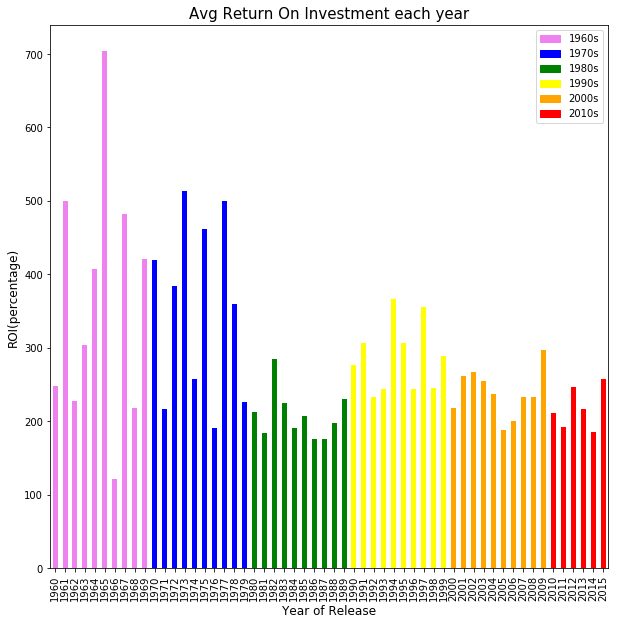

In [366]:
plt.figure(figsize=(10,10))
#Setting Different colors for different Decades
colors={196:'violet',197:'blue',198:'green',199:'yellow',200:'orange',201:'red'}
#Grouping dataset by release_year and finding the reurn on ivestment per year
y=success.groupby('release_year')['profit'].mean()
y.plot(kind='bar',color=[colors[i] for i in (y.index//10)]);
#Tweaking the plot 
plt.title('Avg Return On Investment each year',fontsize=15)
plt.xlabel('Year of Release',fontsize=12)
plt.ylabel('ROI(percentage)',fontsize=12)
#Creating a custom legend
six = mpatches.Patch(color='violet', label='1960s')
seven = mpatches.Patch(color='blue', label='1970s')
eight = mpatches.Patch(color='green', label='1980s')
nine = mpatches.Patch(color='yellow', label='1990s')
ten = mpatches.Patch(color='orange', label='2000s')
ele = mpatches.Patch(color='red', label='2010s')
plt.legend(handles=[six,seven,eight,nine,ten,ele]);

>It seems like the 1960s were a good time for film-makers in comparison to rest of the decades. All the successful films in that time gave a good return 
>
>Let's try to confirm this in some other way

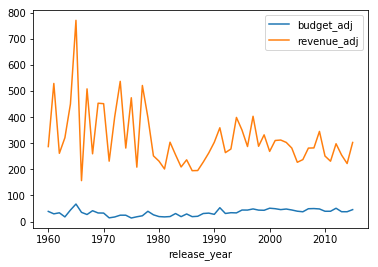

In [342]:
#Making a line plot for adjusted budget and revenue
success.groupby('release_year')[['budget_adj','revenue_adj']].mean().plot()

### Do Holidays Matter?
>We want to know if releasing films in a certain time of the year turned out to be fruitful or whether dates really don't have anything to contribute when it comes to the success of a film
>
>For this, first we will be converting the 'release_date' column into date-time datatype

In [343]:
#Checking the datatype of release_year
success.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 10828
Data columns (total 16 columns):
id                      1000 non-null int64
popularity              1000 non-null float64
original_title          1000 non-null object
cast                    999 non-null object
director                1000 non-null object
runtime                 1000 non-null int64
genres                  1000 non-null object
production_companies    993 non-null object
release_date            1000 non-null datetime64[ns]
vote_count              1000 non-null int64
vote_average            1000 non-null float64
release_year            1000 non-null int64
budget_adj              1000 non-null float64
revenue_adj             1000 non-null float64
profit                  1000 non-null float64
roi                     1000 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(4), object(5)
memory usage: 132.8+ KB


Text(0.5,1,'Profits vs Month of Release')

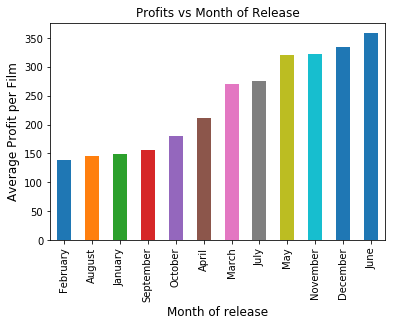

In [351]:
success.groupby(success['release_date'].dt.strftime('%B'))['profit'].mean().sort_values().plot(kind='bar');
plt.xlabel('Month of release', fontsize=12)
plt.ylabel('Average Profit per Film',fontsize=12)
plt.title('Profits vs Month of Release')

>We can reach to a conclusion using this which i will further explain in detail in a later section. For now let's move on to the next part

### Does the audience prefer sitting for a very long time or less time

In [371]:
#Checking the mean runtime of all successful films
success['runtime'].mode()[0]

93

>The most occuring instances for length of a successful movie seems to be 95 minutes, averaging around 1.5 hours
>
>Let's try to confirm this by visualising its relation with profit

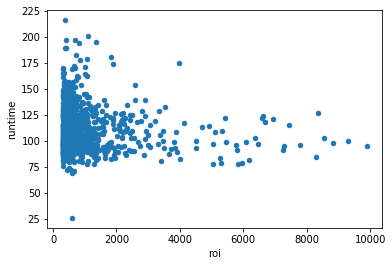

In [355]:
success.plot(kind='scatter',x='roi',y='runtime');

>Movie of all runtime have had a chance at success but if you observe the plot properly, you'll be able to notice somewhat of a horizontal strip with data points between 80 and 120 minutes on they y axis which prove to be the sweet spot when it comes to highly successful films

<a id='conclusions'></a>
# Conclusions
>Now that we have looked at various aspects to each of our question, it seems like we can reach to a conclusion for both the questions
>
>Let's look at each of those questions closely

## 1) Popular Genres



In [362]:
print(x.head())
print(x.tail())

release_year  genres  
1960          Drama       7.361967
1961          Drama       6.915731
1962          Drama       8.232008
1963          Thriller    7.199292
1964          Comedy      7.859657
Name: popularity, dtype: float64
release_year  genres
2011          Drama     128.088313
2012          Drama     140.376994
2013          Drama     166.999176
2014          Drama     246.362717
2015          Drama     243.848091
Name: popularity, dtype: float64


>Upon checking the total popularity garnered by each genre annually, from 1960s to 2015, we got this result
>
>We can see that most of the years are mostly dominated by Drama and Comedy clearly. But there have been breakthroughs made by other Genres from time to time such as Thriller, Adventure as well as Action.
>
>Besides looking at genre popularity annually and by popularity among the audience, let's take a look at which genres did the film makers mostly choose to work on

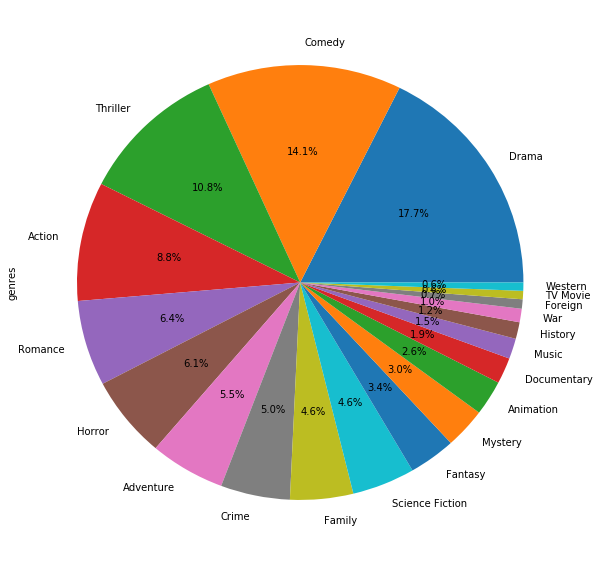

In [357]:
plt.figure(figsize=(10,10))
genre['genres'].value_counts().plot(kind='pie',autopct='%1.1f%%');

>As we can see, not only form the popularity perspective, film-makers themselves chose to work alot in the field of Drama(17.7%), followed up by Comedy(14.1%) and Thriller(10.8%). 
>
>Both perspectives; The audience as well as film-makers' point of view seem to be giving the same results. 
>
>Thus, I think we can claim that Drama and Comedy have been majorly dominant genres throughout

## Factors Contributing to the Success of a Film



Text(0.5,1,'Flop Films')

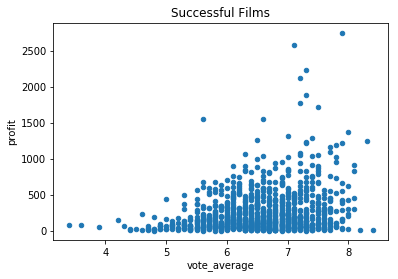

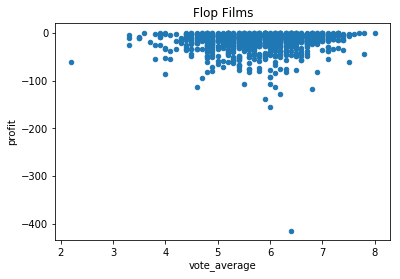

In [360]:
success.plot(kind='scatter',y='profit',x='vote_average');
success['vote_average'].describe()
plt.title('Successful Films')
fail.plot(kind='scatter',y='profit',x='vote_average');
fail['vote_average'].describe()
plt.title('Flop Films')

>We can see that sucessful films have had ratings ranging for a mere 3.5 to a mind-boggling 8.4. 
>
>However more profit has been made as the ratings increase, especially in the range above 7
>
>More and more instances have been plotted as the ratings grew from 3 to higher ratings
>
>Flop films have also had their ratings ranging from 2 to 8.06. 
>
>We can also see that number of instances and degree of loss increase for films with rating averaging between 6 to . Hence movies garnering a score within this range have an uncertain outcome and I don't believe voting averages can really be used as a factor towards success of a film

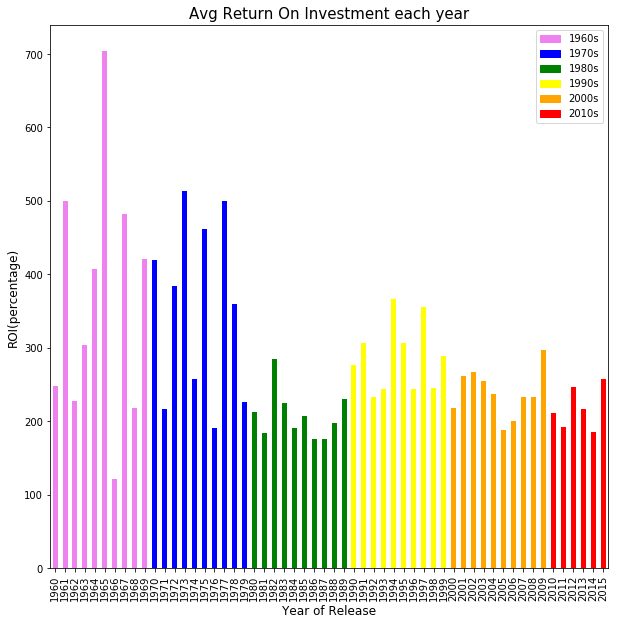

In [365]:
plt.figure(figsize=(10,10))
#Setting Different colors for different Decades
colors={196:'violet',197:'blue',198:'green',199:'yellow',200:'orange',201:'red'}
#Grouping dataset by release_year and finding the reurn on ivestment per year
y=success.groupby('release_year')['profit'].mean()
y.plot(kind='bar',color=[colors[i] for i in (y.index//10)]);
#Tweaking the plot 
plt.title('Avg Return On Investment each year',fontsize=15)
plt.xlabel('Year of Release',fontsize=12)
plt.ylabel('ROI(percentage)',fontsize=12)
#Creating a custom legend
six = mpatches.Patch(color='violet', label='1960s')
seven = mpatches.Patch(color='blue', label='1970s')
eight = mpatches.Patch(color='green', label='1980s')
nine = mpatches.Patch(color='yellow', label='1990s')
ten = mpatches.Patch(color='orange', label='2000s')
ele = mpatches.Patch(color='red', label='2010s')
plt.legend(handles=[six,seven,eight,nine,ten,ele]);

>1960s can be seen as the most successful/profitable decade for film-makers as the average return then overshadows that of the other decades.
>
>I guess this proves why 1960s were consider to be a part of Golden Age of Hollywood (1915-1963) because of the enormous amount of money the movies produced and the images of the glittering and glamorous movie stars that filled the movie screens. The money when account for inflation really proves why its referred to as the Golden Age

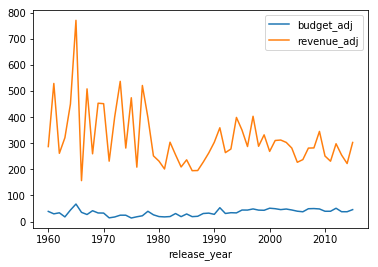

In [367]:
#Making a line plot for adjusted budget and revenue
success.groupby('release_year')[['budget_adj','revenue_adj']].mean().plot()

>It seems like 1960-1980 were very volatile as you can see abrupt changes within the graph itself during those times regarding the revenue, the change in budget has however not see much of a sudden change but rather looks more like a steady line with small peaks and troughs
>
>Even though the 1960-1980s were volatile and had alot of peaks and troughs but even their troughs seemed to be touching around the average of all time and hence 1960s were a good time for the film industry

Text(0.5,1,'Profits vs Month of Release')

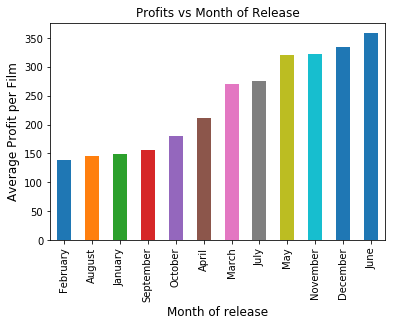

In [372]:
success.groupby(success['release_date'].dt.strftime('%B'))['profit'].mean().sort_values().plot(kind='bar');
plt.xlabel('Month of release', fontsize=12)
plt.ylabel('Average Profit per Film',fontsize=12)
plt.title('Profits vs Month of Release')

>The following plot shows the most profitable months for films throughout 1960-2015. This indicates that Holidays and festive occasions did give the profits a significant boosts.
>
>December,June,July as well as May were all in top 5 months which is the time during which students are issued holidays; (Mid-May - July :summer holidays, Mid-December : Winter Holidays)

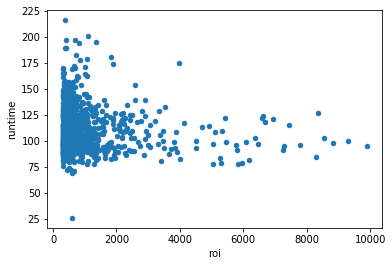

In [373]:
success.plot(kind='scatter',x='roi',y='runtime');

>It is only normal for movies of all runtime to have a chance at being successful, but when we carefully observe the graph, we can visualise a sort of an invisible horizontal strip spanning between 80-120 on the y-axis, between which we not only see the a huge number of instances, but also the highly successful/profitable films also lie in this range as well
>
>The basic statistical figure (mean,median,mode) also support us by staying within this range

## Limitations

>Before we finish with our conclusion, we should mention our limitations in this case.
>
>Firstly, we had to significantly reduce the size of our database by more than half since reports on budget and revenue were missing in many cases and reported to be zero
>Also, in a few cases, the budget and revenue were falsely reported, such as 'The Karate Kid, Part II' which is only one of those cases. (original dataset - >10000 entries ; sample dataset - > <4000 entries)
>
>Since the number of missing values in the second case is very high, we cannot definitely say that our findings apply to the whole dataset as well, since missing values in such a high scale can influence the analysis in some other direction
>
>It is possible that there were more instances of false reports which might have been included in our report but were overlooked. We tried our best to keep the data True by dropping missing values and removing outliers using the help of various sources